# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
# Pkg.update()
# Pkg.add("DualNumbers")
using Plots
# Plots.plotly()
using DualNumbers

## Question 1: Numerical differentiation

**1)** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.



**Answer**

We can set like below,

$$ f_i = f_i $$

$$ f_{i+1} = f_i + h\ f_i' + \frac{1}{2} h^2 f_{i+1}'' + O(h^3) $$

$$ f_{i+2} = f_i + 2h\ f_i' + \frac{1}{2} (2h)^2 f_i'' + O(h^3) $$

and then, use linear combination to find three values, 
$a_1\ f_{i},\ a_2\  f_{i+1},\ a_3\ f_{i+2} $ :

$$ a_1 f_{i-1} + a_2 f_{i} + a_3 f_{i+1} $$

Using Taylor expansions:

$$ a_1 f_{i-1} + a_2 f_{i} + a_3 f_{i+1} = (a_1+a_2+a_3)f_i + (a_2 + 2a_3)hf_i'+\frac{1}{2} (a_2+4a_3)h^2f_i''+O(h^3) $$

We want to find $ f_i'$ , thus set coefficients as 1, 0 for $f_i$ and $f_i''$. 
$$ a_1+a_2+a_3 = 0 $$
$$ a_2+2a_3 = 1 $$
$$ a_2+4a_3 = 0 $$

then we can get solutions $a_1 = -\frac{3}{2}$, $a_2 = 2$, $a_3 = -\frac{1}{2}$

Finally, we get $f_i'$ by diving up by h.

$$ f_i' = \frac{2f_{i+1} -\frac{1}{2}f_{i+2} - \frac{3}{2}f_i }{h} + O(h^2) $$

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**Answer **

$f(x) = sin(exp(x)) $ , then $f'(x) = e^xcos(e^x)$ 

$$ f'(1) = \ ecos(e)\ \approx -2.47834973296$$


**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

In [5]:
function get_errors(f,x,dx)
    return (2*f(x+dx) - 0.5*f(x+2*dx) - 1.5 * f(x))/dx
end

get_errors (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] abs(::Array{Float64,1}) at .\deprecated.jl:57
 [3] include_string(::String, ::String) at .\loading.jl:515
 [4] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\okokq\.julia\v0.6\IJulia\src\execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at C:\Users\okokq\.julia\v0.6\IJulia\src\eventloop.jl:8
 [7] (::IJulia.##14#17)() at .\task.jl:335
while loading In[6], in expression starting on line 12



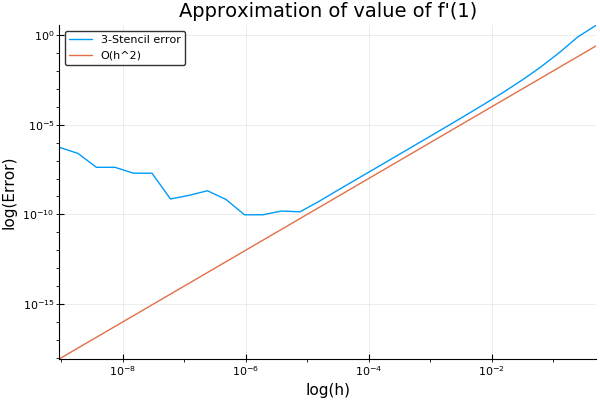

In [6]:
f(x) = sin(exp(x))
values = Array{Float64}(30)
dx = Array{Float64}(30)

for i = 1:30
    dx[i] = 2.0^(-i)
    values[i] = get_errors(f, 1, dx[i] )
end

df = cos(exp(1.0))*exp(1.0)

plot(dx, abs(values-df), label="3-Stencil error",
    xaxis=:log, 
    yaxis=:log,
    title="Approximation of value of f'(1)",
    xlabel="log(h)",
    ylabel="log(Error)")

plot!(dx, dx.^2, label="O(h^2)")

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

In [7]:
x = Dual(1,1)
y = f(x)
dualpart(y) - df == 0.0
# => It is accurate to within machine precision

true